### Implement a code to solve the full Hamiltonian with adaptive step size

The system is of the form: 
$$
\begin{align}
dq&=pdt \\
dp&= F(q) dt - \gamma p dt + \sqrt{2 \frac{\gamma}{\beta}} dW
\end{align}
$$
with $F(q)= q^2/2$.

We have using $\frac{dt}{ds} = g(x)$ that the system below has the same invariant distribution: 
$$
\begin{align}
dq&=g(q)pdt \\
dp&= g(q) F(q) dt - \gamma g(q) p dt + \sqrt{2 \frac{\gamma}{\beta} g(q)} dW
\end{align}
$$
with $F(q)= q^2/2$.

With the method BAOAB, we have: 
1. Step A
$$
dq=pdt\\
\dot{p}=0
$$
can not be simply generated as: 
$$
q_{n+1}=q_n+h p_n g(q_n)
$$
due to the non linearity of the term $g(q_n)$. 
Let's try and get a better method by using: 
$$
q_{n+1}=q_n+h p_n g(\frac{q_n+q_{n+1}}{2})
$$
where $q_{n+1/2} = \frac{q_n+q_{n+1}}{2}$.

We have:  
$$
q_{n+1/2} = q_n + \frac{h}{2} p g(q_{n+1/2}) \\
g(q_{n+1/2}) = g( q_n + \frac{h}{2} p g(q_{n+1/2})) \\
g_{n+1/2} = g( q_n + \frac{h}{2} p g_{n+1/2}) \\
$$
and now we can use fixed point iterations by setting : 
$$
g^0_{n+1/2} = g( q_n + \frac{h}{2} p g_{n}) \\
g^1_{n+1/2} = g( q_n + \frac{h}{2} p g^0_{n+1/2}) \\
g^2_{n+1/2} = g( q_n + \frac{h}{2} p g^1_{n+1/2}) \\
g^3_{n+1/2} = g( q_n + \frac{h}{2} p g^2_{n+1/2}) \\
\dots
$$

and finally compute: 
$$
q_{n+1}=q_n+h p_n g^l_{n+1/2}
$$


2. Step B . 
$$
dp=g(q) F(q) ds\\
\dot{q}=0
$$
is generated as: 
$$
p_{n+1}=p_n+g(q_n) F(q_n) h\\
$$

3. Step O
$$
dp=-g(q) \gamma p ds + \sqrt{2 \gamma \beta^-1 g(q)} dW(s)\\
\dot{q}=0
$$
is generated as: 
$$
p_{n+1}=\exp(-\gamma g(q_n) h) p_n+ \sqrt{\frac{1-\exp(2 \gamma g(q_n)h)}{\beta}} \mathcal{N}(0,1)
$$

In [144]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.integrate as integrate
from numba import jit,njit,vectorize, float64, int32
import numba as nb
import time as time
## ---------------- Mathplotlib settings ----------------
SMALL_SIZE = 12
MEDIUM_SIZE = 18
BIGGER_SIZE = 25

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title



### Find an adaptive step size that works with the problem 

This is not so easy to do, therefore we would like to establish a step size that we control very well. Say we would like a step size with values between $\Delta t_{min} =0.001$ and $\Delta t_{max}=0.2$, with a growth to the step size we like control by the parameter $R$. 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


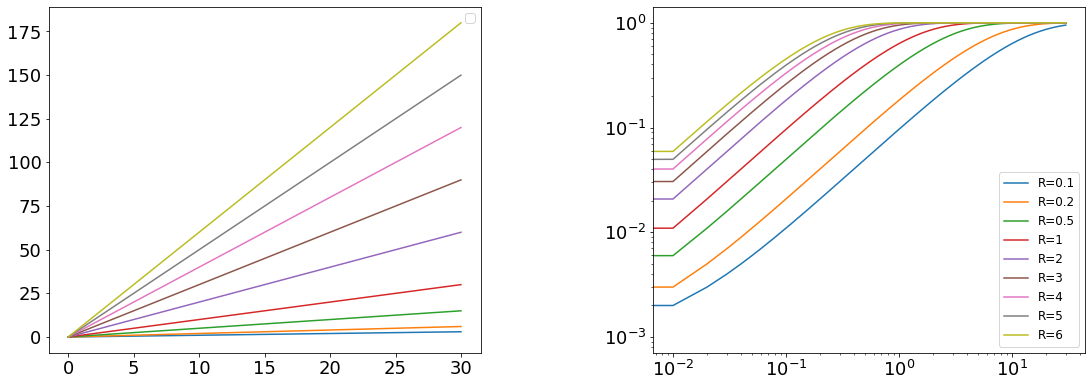

In [145]:
def var_stepsize1(x,dtmin,R):
    return (np.abs(x))*R+dtmin

def var_stepsize2(x,dtmin, dtmax, R):
    return (dtmax-dtmin)/dtmax*(1-np.exp(-np.abs(x)*R))+dtmin/dtmax


x=np.arange(0,30,0.01)

fig, (ax1,ax2)= plt.subplots(1, 2,figsize=(18,6))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.1,bottom=0.1,right=0.9, top=0.9, wspace=0.4, hspace=0.4)

Rrange=[0.1,0.2,0.5,1,2,3,4,5,6]
for ri in Rrange:
    ax1.plot(x,var_stepsize1(x,0.0001, ri))
    ax2.loglog(x,var_stepsize2(x,0.0001, 0.1,ri),label="R="+str(ri))
ax1.legend()
ax2.legend()

In [149]:
%run "/home/s2133976/OneDrive/ExtendedProject/codingUsingNumba/WeakSDEapproximation/numba code/underdamped_adaptive.py"
%run "/home/s2133976/OneDrive/ExtendedProject/codingUsingNumba/WeakSDEapproximation/numba code/underdamped.py"
%run "/home/s2133976/OneDrive/ExtendedProject/codingUsingNumba/WeakSDEapproximation/numba code/underdamped_adaptive2.py"

[[-8.87311432e-01 -6.09127820e-02  7.00000000e+01]
 [-1.73490872e+00  1.21649362e-01  1.17000000e+02]
 [-4.70151380e-03  1.88302424e-01  8.20000000e+01]
 [-1.68823367e+00 -1.89031723e-01  8.60000000e+01]
 [-6.62906009e-01 -6.12064435e-01  8.00000000e+01]
 [ 5.88860574e-01  6.12238300e-01  6.40000000e+01]
 [-1.05234739e+00 -2.00830148e-02  8.30000000e+01]
 [-7.25945789e-01  1.01900689e+00  1.02000000e+02]
 [-1.02002149e+00  1.24778277e-01  8.20000000e+01]
 [-1.70247869e+00 -1.16000666e+00  1.23000000e+02]]


<Figure size 432x288 with 0 Axes>

In [147]:
T=10
h = 0.1
gamma = 0.1
beta=1
# compile
N=1
%time qp=method_baoab(N,T,gamma,beta,h)

# run for 1 no compiler 
N=1
%time qp=method_baoab_ada(N,T,gamma,beta,h)

dtbounds=np.array([0.01,0.1])
%time qp=method_baoab_ada2(N,T,gamma,beta,h,dtbounds)

CPU times: user 1.12 s, sys: 3.98 ms, total: 1.13 s
Wall time: 1.13 s
CPU times: user 1.21 s, sys: 81 µs, total: 1.21 s
Wall time: 1.07 s
CPU times: user 1.73 s, sys: 7.89 ms, total: 1.73 s
Wall time: 1.6 s


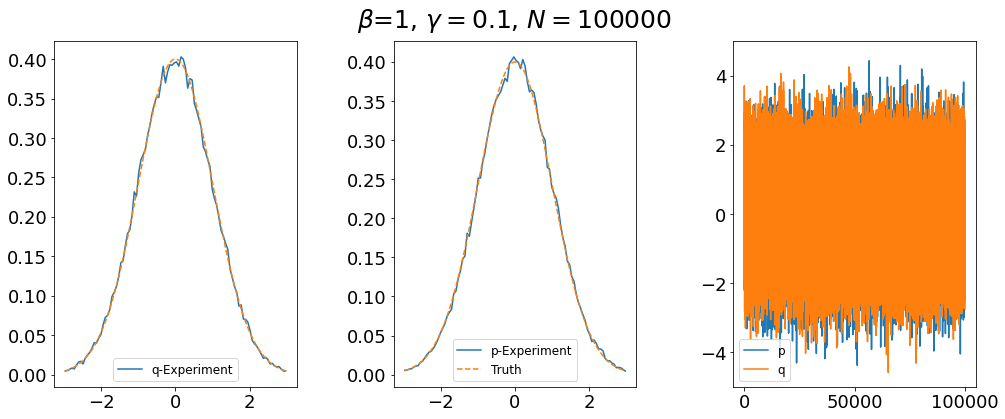

In [8]:
## Non adaptive time steps
T=200
h = 0.1
gamma = 0.1
beta=1
N=10**5
qp4=method_baoab(N,T,gamma,beta,h)
plot_qp(qp4,beta,gamma)

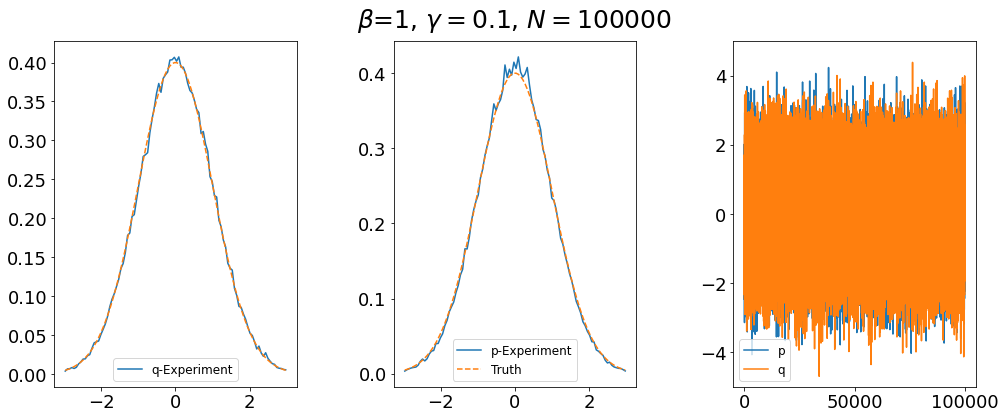

In [9]:
## Adaptive time steps with y set to 1. 
T=200
h = 0.5
gamma = 0.1
beta=1
N=10**5
qp2=method_baoab_ada(N,T,gamma,beta,h)
plot_qp(qp2,beta,gamma)

Now that it seems to be working with a simple adaptive function g(x), we can try with one that is a bit more elaborated and tailored to the problem of interest. Similarly to what is done for the overdamped, we select a function $g(x)$ which is bounded. Typically, we choose: 
$$
g^{-1}(x) = \frac{\sqrt{ \|f(x)\|^2+m^2}}{\frac{1}{M}\sqrt{\|f(x)\|^2+m^2}+1},
$$
such that : 
$$
g(x) = \frac{\frac{1}{M}\sqrt{\|f(x)\|^2+m^2}+1}{\sqrt{ \|f(x)\|^2+m^2}} 
$$
where $f(x)=-\nabla V(x) = -x$.

(0.0, 0.2)

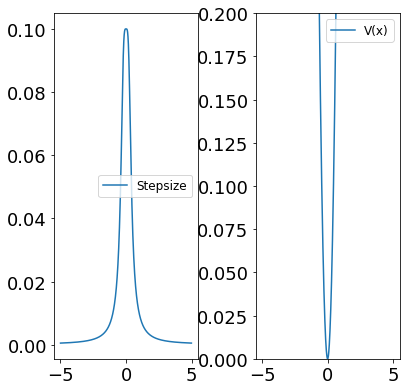

In [63]:
## Adaptive time steps with y set to 1. 
def g_plot(x,h,dtbounds):
    """
    Compute the value of the adaptive function choosen:
    x: float 
    """
    dtmin=dtbounds[0]
    dtmax=dtbounds[1]

    M=h/dtmin
    m=h/dtmax


    # value of function f, f' and f^2
    f=np.abs(x)
    f2 = f*f

    #compute the value of phi(f(x)) = \sqrt{f(x)^2}
    phif2 = f2*f2

    # value of m^2
    m2 = m*m

    #compute gx
    gx_den=np.sqrt(phif2+m2)
    gx_num = gx_den/M + 1 
    gx=gx_num/gx_den

    #return
    re=gx
    return re

fig, (ax1,ax2)= plt.subplots(1,2,figsize=(6,6)) 
fig.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
dtbounds=np.array([0.0001,0.1])
h = 0.01
x = np.arange(-5,5,0.01)
ax1.plot(x,g_plot(x,h,dtbounds)*h,label="Stepsize")
ax1.legend()

ax2.plot(x,x*x/2,label="V(x)")
ax2.legend()
ax2.set_ylim(0,0.2)


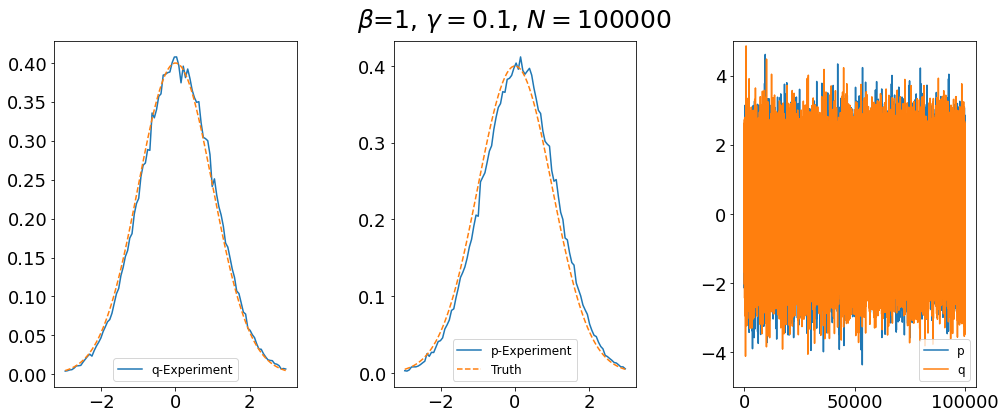

In [89]:
dtbounds=np.array([0.0001,0.1])
h = 0.01
T=200
gamma = 0.1
beta=1
N=10**5
qp2=method_baoab_ada2(N,T,gamma,beta,h,dtbounds)
plot_qp(qp2,beta,gamma)

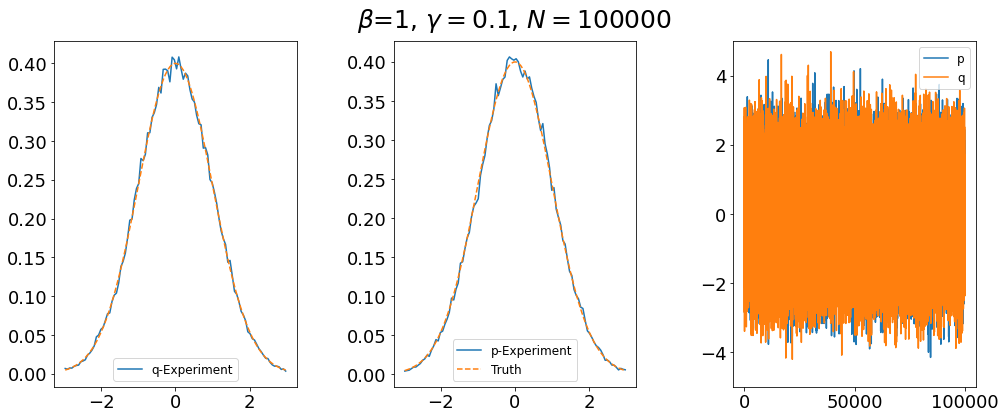

In [90]:
dtbounds=np.array([0.01,0.1])
h = 1
T=200
gamma = 0.1
beta=1
N=10**5
qp2=method_baoab_ada2(N,T,gamma,beta,h,dtbounds)
plot_qp(qp2,beta,gamma)

Now that we have verified visually that the results look good, one might want to try and test the quality of the results.

### Compare solutions between adaptive method and non adaptive methods



In [59]:
## Adaptive time steps with y set to 1. 
dtbounds=np.array([0.01,0.1])
h = 1
T=200
gamma = 0.1
beta=1
N=10
qp2=method_baoab_ada2(N,T,gamma,beta,h,dtbounds)
# plot_qp(qp2,beta,gamma)

0.031623
[0.00562 0.1    ]
0.01
[0.001 0.1  ]
0.003162
[0.00018 0.1    ]


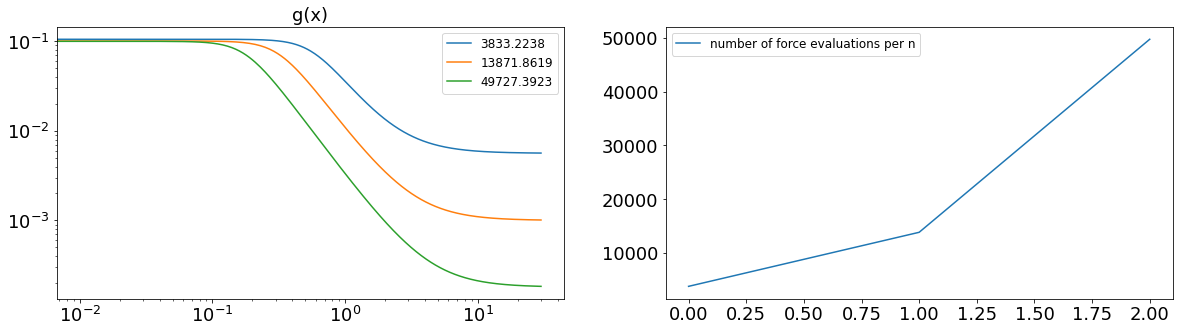

In [176]:
## Get an idea of how much mean steps required 
y_sol=[] #solution
t_sol=[] #count per run
n_force_eval=[] #mean count per sample

## Adaptive time steps with y set to 1. 
T=200
gamma = 0.1
beta=1
N=10**4

fig, (ax1,ax2)= plt.subplots(1,2,figsize=(20,5))# plt.figure(figsize=(4,4))

for ii in range(3,6,1):
    #set up new bounds
    dt = np.round(np.power(0.01,ii/4),6)
    dtbounds=[np.power(0.001,ii/4),0.1]
    dtbounds =np.round(dtbounds,5)
    print(dt)
    print(dtbounds)
    #compute the solution
    qpt=method_baoab_ada2(N,T,gamma,beta,dt,dtbounds)
    y_sol.append(qpt)

    #evaluate the mean number of steps taken
    mean_eval = np.mean(qpt[::,2])
    n_force_eval.append(mean_eval)

    # #plot the look of the function g(x)
    g_test = g_plot(x,dt,dtbounds)
    ax1.loglog(x,g_test*dt,label=str(mean_eval))
    ax1.set_title("g(x)")
    ax1.legend()

#plot the mean number of steps taken
ax2.plot(n_force_eval,"-",label="number of force evaluations per n")
ax2.legend()

In [177]:
    
# axis of the plot 
def plot_qp_axs(qp,beta,gamma,ax1,ax2,ax3):
    # fig, (ax1,ax2,ax3)= plt.subplots(1, 3,figsize=(16,6))# plt.figure(figsize=(4,4))
    fig.subplots_adjust(left=0.1,
                        bottom=0.1, 
                        right=0.9, 
                        top=0.9, 
                        wspace=0.4, 
                        hspace=0.4)

    fig.suptitle("$\\beta$="+str(beta)+", $\\gamma=$"+str(gamma)+", $N=$"+str(len(qp[::,0])))

    #Plot 1
    ## position q experiment
    histogram,bins = np.histogram(qp[::,0],bins=100,range=[-3,3], density=True)
    midx = (bins[0:-1]+bins[1:])/2
    ax1.plot(midx,histogram,label='q-Experiment')
    ax1.legend() 

    #Plot 2: 
    ### momentum p experiment
    histogram,bins = np.histogram(qp[::,1],bins=100,range=[-3,3], density=True)
    midx = (bins[0:-1]+bins[1:])/2
    # histogram=(histogram/np.sum(histogram)*(midx[1]-midx[0]) )
    ax2.plot(midx,histogram,label='p')


    ### mementum p true
    rho = np.exp(- beta*(midx**2)/2)
    rho = rho / ( np.sum(rho)* (midx[1]-midx[0]) ) # Normalize rho by dividing by its approx. integral
    ax2.plot(midx,rho,'--',label='Truth')
    ax1.plot(midx,rho,'--',label='Truth')
    ax2.legend() 

    #Plot 3 
    ax3.set_ylim(-5,5)
    ax3.plot(qp[::,1],label="p")
    ax3.plot(qp[::,0],label="q")

    ax3.legend()

Let's take a look at the plots of the solutions, to make sure that they do make sens!

(10000, 3)
(10000, 3)
(10000, 3)


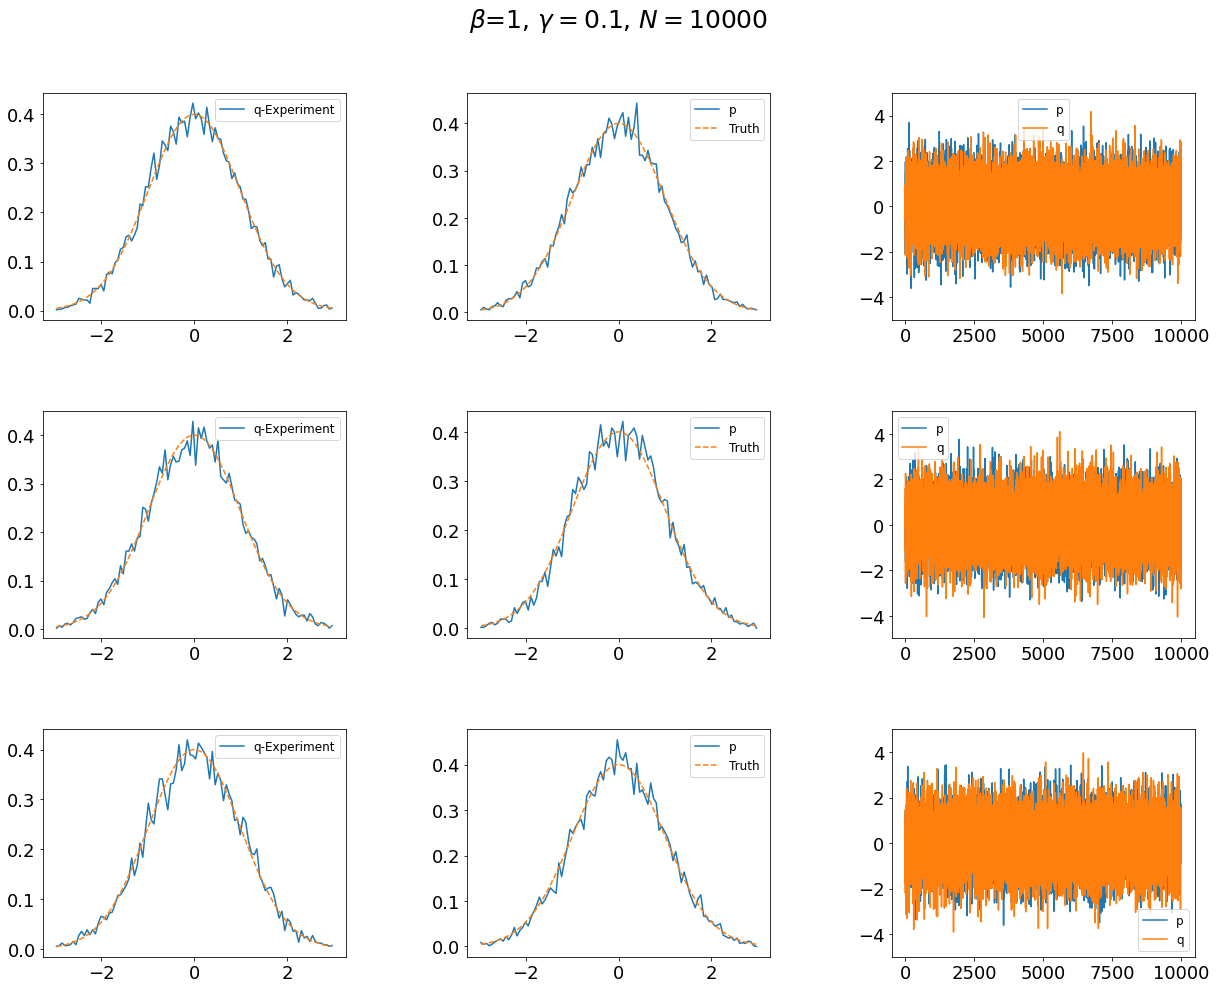

In [178]:
fig, (axs)= plt.subplots(len(y_sol), 3,figsize=(20,15))# plt.figure(figsize=(4,4))

for i in range(len(y_sol)):
    qpti=y_sol[i]
    print(np.shape(qpti))
    plot_qp_axs(qpti,beta,gamma,axs[i,0],axs[i,1],axs[i,2])
    
        

Now to try and look at the quality of the simulations, we can get an error estimate! 

In [190]:
def compute_error(y_sol):
    err_force=np.zeros((2,len(y_sol)))
    for i in range(len(y_sol)):
        qpti=y_sol[i]

        histogramq,bins = np.histogram(qpti[::,0],bins=100,range=[-3,3], density=True)
        midx = (bins[0:-1]+bins[1:])/2

        histogramp,bins = np.histogram(qpti[::,1],bins=100,range=[-3,3], density=True)
        midx = (bins[0:-1]+bins[1:])/2

        rho = np.exp(- beta*(midx**2)/2)
        rho = rho / ( np.sum(rho)* (midx[1]-midx[0]) ) # Normalize rho by dividing by its approx. integral

        err_force[0,i]=np.sqrt(np.sum(np.square(histogramq-rho)))
        err_force[1,i] = np.sqrt(np.sum(np.square(histogramp-rho)))
        # err_force[2,::]=np.mean(qpti[::,2])
    return(err_force)


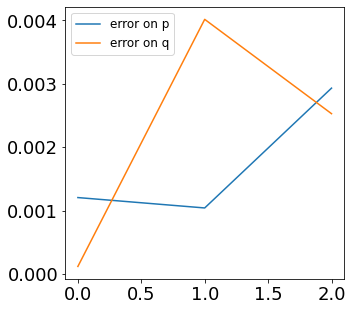

In [189]:
err = compute_error(y_sol)
fig, (axs)= plt.subplots(1, 1,figsize=(5,5))# plt.figure(figsize=(4,4))
axs.plot(err[0,::],label="error on p")
axs.plot(err[1,::],label="error on q")
axs.legend()

now we want to use the non adaptive to evaluate the quality, we have computed the average number of force evaluations required in the previous run in the variable `n_force_eval`, and we can use that to compute the non variable `dt` in the non adaptive baoab method. 

In [191]:
## Get an idea of how much mean steps required 
y_sol_noada=[] #solution

## Adaptive time steps with y set to 1. 
T=200
gamma = 0.1
beta=1
N=10**4

for ii in range(len(n_force_eval)):
    #set up the number of force evaluations accepted
    Ntimes=int(n_force_eval[ii])
    #compute the solution
    qpt=method_baoabN(N,gamma,beta,T,Ntimes)
    y_sol_noada.append(qpt)


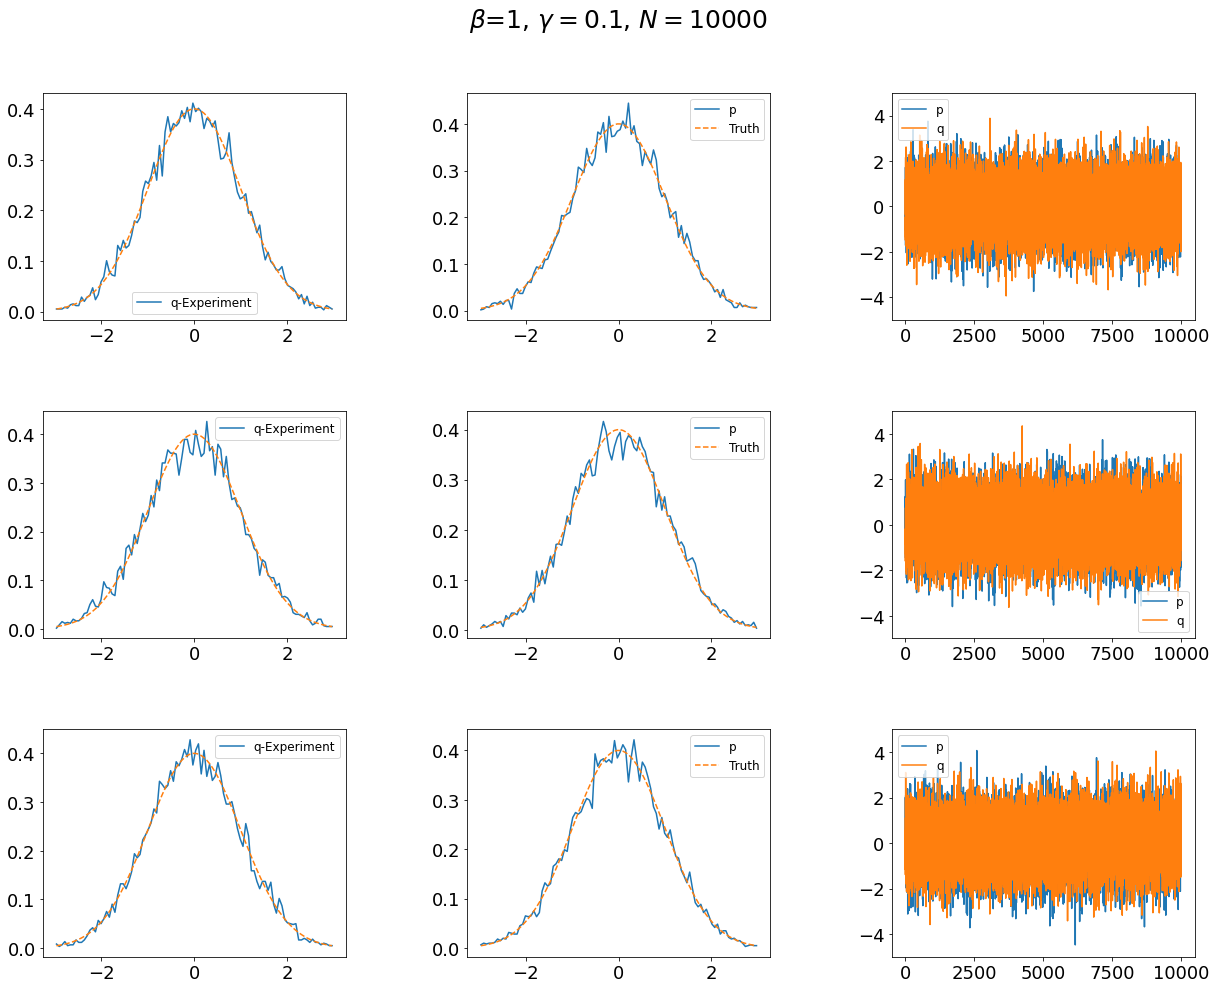

In [193]:
fig, (axs)= plt.subplots(len(y_sol_noada), 3,figsize=(20,15))# plt.figure(figsize=(4,4))

for i in range(len(y_sol_noada)):
    qpti=y_sol_noada[i]
    # print(np.shape(qpti))
    plot_qp_axs(qpti,beta,gamma,axs[i,0],axs[i,1],axs[i,2])
    
        

compute the error on the non adaptive method to compare the results on the adaptive method 

In [194]:
err_noada = compute_error(y_sol_noada)

Now lets plot the error curve on p and q and compare the results on the two methods

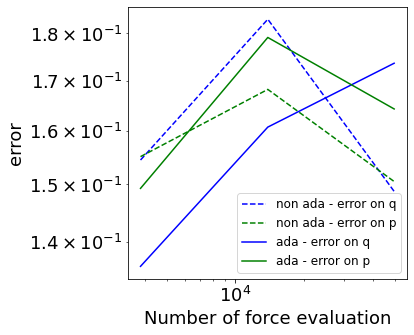

In [197]:
err = compute_error(y_sol)
fig, (axs)= plt.subplots(1, 1,figsize=(5,5))# plt.figure(figsize=(4,4))
axs.loglog(n_force_eval,err_noada[0,::],"--",color="blue",label="non ada - error on q")
axs.loglog(n_force_eval,err_noada[1,::],"--",color="green",label="non ada - error on p")
axs.loglog(n_force_eval,err[0,::],color="blue",label="ada - error on q")
axs.loglog(n_force_eval,err[1,::],color="green",label="ada - error on p")
axs.set_ylabel("error")
axs.set_xlabel("Number of force evaluation")
axs.legend()